<div class="alert alert-block alert-info" style="color: rgb(0,53,91);">
  <div style="text-align:center;"><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:600px; height:170px;" title="Logo ITESO"></div>
  <br><br>
  <div style="font-family:'Times New Roman'; font-size:52px; font-weight:bold; text-align:center;">Examen III</div>
  <div style="font-family:'Times New Roman'; font-size:27px; font-weight:bold; text-align:center;">Laboratorio de procesamiento de datos</div>
  <br><br><br><br>
  <div style="font-family:'Times New Roman'; font-size:17px; text-align:right;">Diego Eduardo Martínez Sincel</div>
  <div style="font-family:'Times New Roman'; font-size:17px; text-align:right;">Diego Ubaldo Crespo Neri</div>
  <div style="font-family:'Times New Roman'; font-size:17px; text-align:right;">Demien Becerra Lozano</div>
</div>

## Instrucciones

A continuación los pasos a realizar. Lee con atención  y responde en tu notebook lo que se pide: 

1. Tomar el dataset dado.
2. Hacer un análisis descriptivo y agrupado de los datos. De este punto se espera que el alumno identifique las carencias de la base (información faltante y/o mal presentada) así como el potencial de las variables predictoras hacia la variable de respuesta (`client_stayed`).
    - Este punto trata de analizar el estado en el cual se recibe el conjunto de datos **y explicarlo de manera somera pero con gráficos/tablas que soporten conclusiones preliminares**.
        - Nota: Solamente nombrar columnas o decir que hay X números NO es un análisis descriptivo EDA.
    - Hacer análisis cruzados: Análisis entre varias variables y no solo de manera individual. **Se espera que hagas estos análisis y expliques qué se hace y qué observas en cada uno**.
3. Preprocesar los datos.
    - Se espera que se limpien y/o estandaricen según sea necesario en este punto del proceso.
    - Rellenar información faltante.
      - Explicar el porqué del método elegido.
      - Evaluar los impactos en el conjunto de datos del método elegido. Responder:
          - ¿La variable después de rellenar cambió su distribución de alguna forma?
          - ¿Cambiaron estadísticos como el promedio y la desviación estándar de la variable?
          - ¿Cambió la correlación de la variable con la variable objetivo?
    - Generar un proceso de feature engineering.
        - Crear nuevas variables a partir de las existentes Se deben de crear al menos 5 variables y agregarlas al DataFrame para poder hacer los análisis subsecuentes. Para cada variable creada responder: 
            - ¿Cuál es tu hipótesis? ¿Por qué esa variable puede servir?
            - Después de observar el potencial de la variable explica su comportamiento. ¿Qué observas de tu variable al ser comparada con la variable de respuesta?
        - **Se debe de cuidar que no haya leakage en ninguna de las variables producidas**.
    - Generar un proceso de selección de variables.
        - Se debe de escoger entre al menos una de las siguientes opciones:
            - Varianza.
            - Correlaciones.
            - Coeficientes de una regresión logística.
        - Responder:
            - ¿Cómo se implementó el método utilizado? 
            - ¿Por qué se escogió este método?
            - ¿Qué variables se van a seleccionar con el método?
            - ¿**Cómo puedo demostrar** que las variables elegidas son mejores que las no elegidas?
            - ¿Algunas de las variables generadas con el punto b quedaron elegidas? ¿Por qué?


## Variables

A continuación se adjunta una descripción breve de las variables y de su contenido.

1. `Clientnum`: Id único para el cliente.
2. `Client_stayed`: **Variable de respuesta**. Es 1 si el cliente sigue con el banco o 0 si el cliente decidió dejar de ser cliente.
3. `Customer_age`: Edad del cliente medida en años.
4. `Gender`: Género del cliente. `M` para hombres y `F` para mujeres.
5. `Dependent_count`: Número de dependientes económicos del cliente.
6. `Education_level`: Escolaridad del cliente.
7. `Marital_status`: Estado civil del cliente.
8. `Income_category`: El banco no cuenta con los salarios exactos de los clientes, por lo que esta variable representa un aproximado medio del salario del mismo medido en dólares estadounidenses.
9. `Card_category`: Tipo de instrumento de crédito que tiene el cliente.
10. `Months_on_book`: Periodo en el que el cliente ha estado activo (desde la activación de su instrumento de crédito).
11. `Total_relationship_count`: Número de productos del banco que tiene el cliente. El cliente no está limitado a solo tener su instrumento de crédito, puede tener relación con otras áreas del banco.
12. `Months_inactive_12_mon`: Número de meses que el cliente ha dejado de utilizar su instrumento de crédito en los últimos 12 meses.
13. `Contacts_count_12_mon`: Número de contactos telefónicos que ha hecho el cliente al banco en los últimos 12 meses.
14. `Credit_limit`: Límite del instrumento crediticio medido en dólares estadounidenses.
15. `Total_revolving_bal`: Balance total del instrumento crediticio (cantidad a pagar por el cliente).
16. `Total_trans_amt`: Dinero transaccionado a través del instrumento crediticio en los últimos 12 meses.
17. `Total_trans_ct`: Número de transacciones realizadas a través del instrumento crediticio en los últimos 12 meses.

---

## Configuración

In [43]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np

from scipy.stats import chi2, chi2_contingency
from feature_engine.imputation import RandomSampleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Estilo/toutl.mplstyle')
from style import *

In [44]:
df = pd.read_csv('Datos/examen3.csv')

---

## Análisis Descriptivo


In [45]:
display(df)
display(df.info())

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

None

- No hay nulos evidentes.
- La variable de respuesta es binaria.
- `credit_limit` parece tener enteros pero es interpretada como flotante.
    - Puede ser un error o haber valores con decimales.

In [46]:
display(df.describe(include='O'))
display(df.describe().round(2))

,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,1666.6666666666667,Blue
freq,5358,3128,4687,3561,9436


,clientnum,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,0.84,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,4404.09,64.86
std,3.690378e+07,0.37,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,3397.13,23.47
min,7.080821e+08,0.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,510.00,10.00
25%,7.130368e+08,1.00,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,2155.50,45.00
50%,7.179264e+08,1.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3899.00,67.00
75%,7.731435e+08,1.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,4741.00,81.00
max,8.283431e+08,1.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,18484.00,139.00


- Las variables numéricas tienen magnitudes muy diferentes entre sí.
    - Será necesario estandarizar.

In [47]:
for col in df:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    
    print(f'Columna: {col}')
    print(f'  - Cardinalidad: {num_unique}')
    print(f'  - {unique_values}')

    print('_' * 40)

Columna: clientnum
  - Cardinalidad: 10127
  - [768805383 818770008 713982108 ... 716506083 717406983 714337233]
________________________________________
Columna: client_stayed
  - Cardinalidad: 2
  - [1 0]
________________________________________
Columna: customer_age
  - Cardinalidad: 45
  - [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
________________________________________
Columna: gender
  - Cardinalidad: 2
  - ['M' 'F']
________________________________________
Columna: dependent_count
  - Cardinalidad: 6
  - [3 5 4 2 0 1]
________________________________________
Columna: education_level
  - Cardinalidad: 7
  - ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
________________________________________
Columna: marital_status
  - Cardinalidad: 4
  - ['Married' 'Single' 'Unknown' 'Divorced']
________________________________________
Columna: income_categ

- En `clientnum` no hay IDs repetidos, por lo que podemos deshacernos de la columna.
- Tenemos variables con valores parecidos a nulos (en forma de 'Unknown'):
    - `education_level`
    - `marital_status`
    - `income_category`
- La mayoría de las variables categóricas son ordinales.
    -  A excepción de `marital_status` y `gender` que son nominales.

In [48]:
display(df['client_stayed'].value_counts(normalize=True))

client_stayed
1    0.83934
0    0.16066
Name: proportion, dtype: float64

- Conocer la proporción de clientes que se mantuvieron es escencial (variable de respuesta).
    - La mayoría se queda.

---

Nos deshacemos de la columna de IDs como mecionamos anteriormente.

In [49]:
if "clientnum" in df.columns:
    df = df.drop(["clientnum"], axis=1)

Para efecto de visualizar los datos con facilidad separamos las categorías en dos:
- Aquellas discretas y categóricas ($\text{cardinalidad} < 10$).
- Y las continuas ($\text{cardinalidad} > 10$).

Mantenemos en la variable de respuesta en ambos subconjuntos.

In [50]:
cardinalidad = df.nunique()

cols_baja = [col for col in df.columns if cardinalidad[col] < 10] 
cols_alta = [col for col in df.columns if cardinalidad[col] > 10] 
 
cardinalidad_baja = df[cols_baja]
cardinalidad_alta = df[['client_stayed'] + cols_alta]

display(cardinalidad_alta.head())
display(cardinalidad_baja.head())

,client_stayed,customer_age,months_on_book,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,39,12691.0,777,1144,42
1,1,49,44,8256.0,864,1291,33
2,1,51,36,3418.0,0,1887,20
3,1,40,34,3313.0,2517,1171,20
4,1,40,21,4716.0,0,816,28


,client_stayed,gender,dependent_count,education_level,marital_status,income_category,card_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon
0,1,M,3,High School,Married,5833.333333333333,Blue,5,1,3
1,1,F,5,Graduate,Single,1666.6666666666667,Blue,6,1,2
2,1,M,3,Graduate,Married,8333.333333333334,Blue,4,1,0
3,1,F,4,High School,Unknown,1666.6666666666667,Blue,3,4,1
4,1,M,3,Uneducated,Married,5833.333333333333,Blue,5,1,0


### Distribuciones

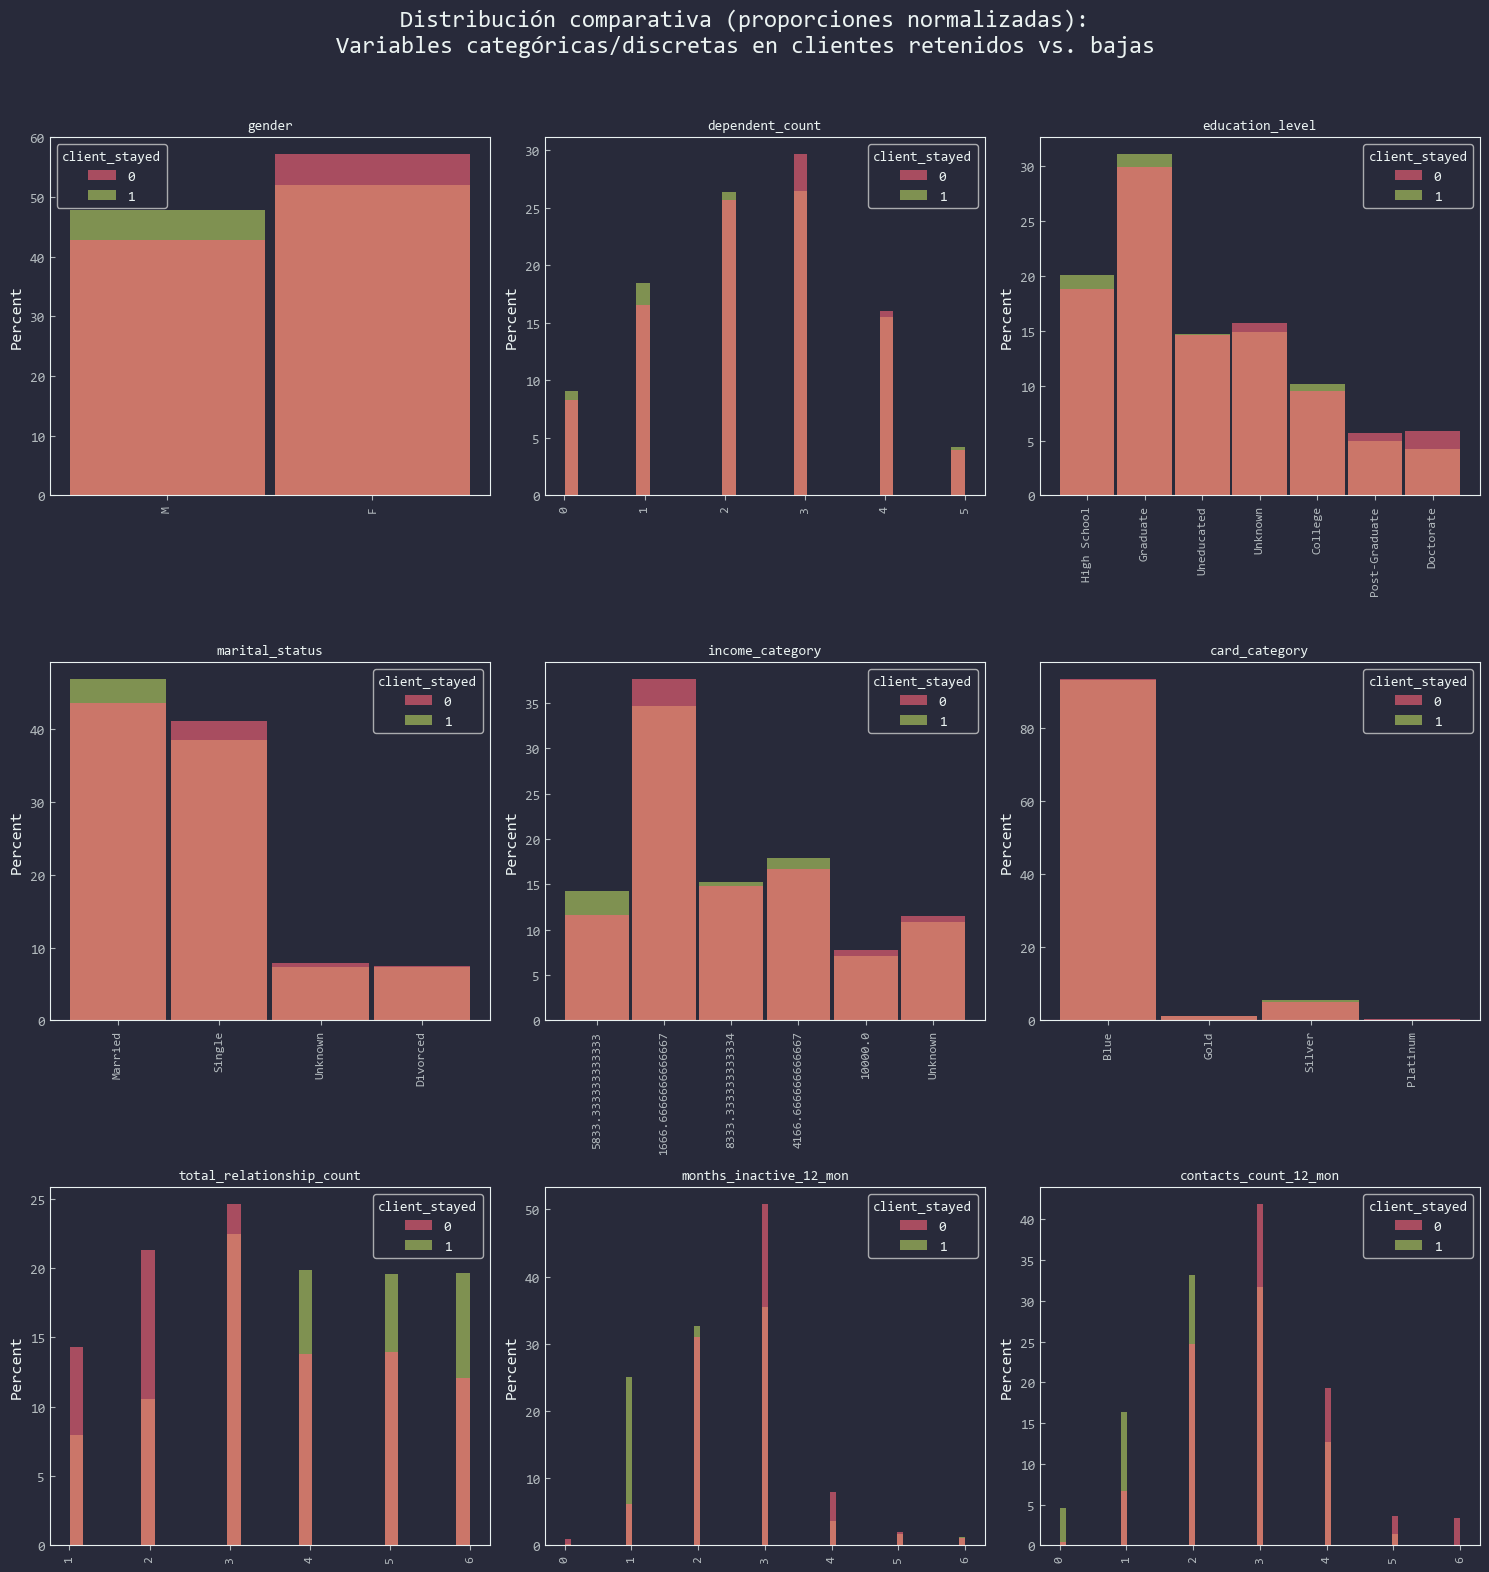

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(15, 16))

for ax, column in zip(axes.flat, cardinalidad_baja.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                 alpha=0.6, edgecolor='none', shrink=0.95,
                 stat='percent', common_norm=False)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

fig.suptitle("Distribución comparativa (proporciones normalizadas):\n" +
             "Variables categóricas/discretas en clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

- La mayoría de las variables tienen distribuciones similares entre clientes retenidos y bajas.
- Tres variables muestran diferencias notables:
    - `total_relationship_count`: Los clientes que se dan de baja tienen, en promedio, menos relaciones con otras áreas del banco.
    - `moths_inactive_12_mon`: Mayor inactividad en los que cancelan.
    - `contacts_count_12_mon`: Hay más contactos telefónicos previos en los que se van.

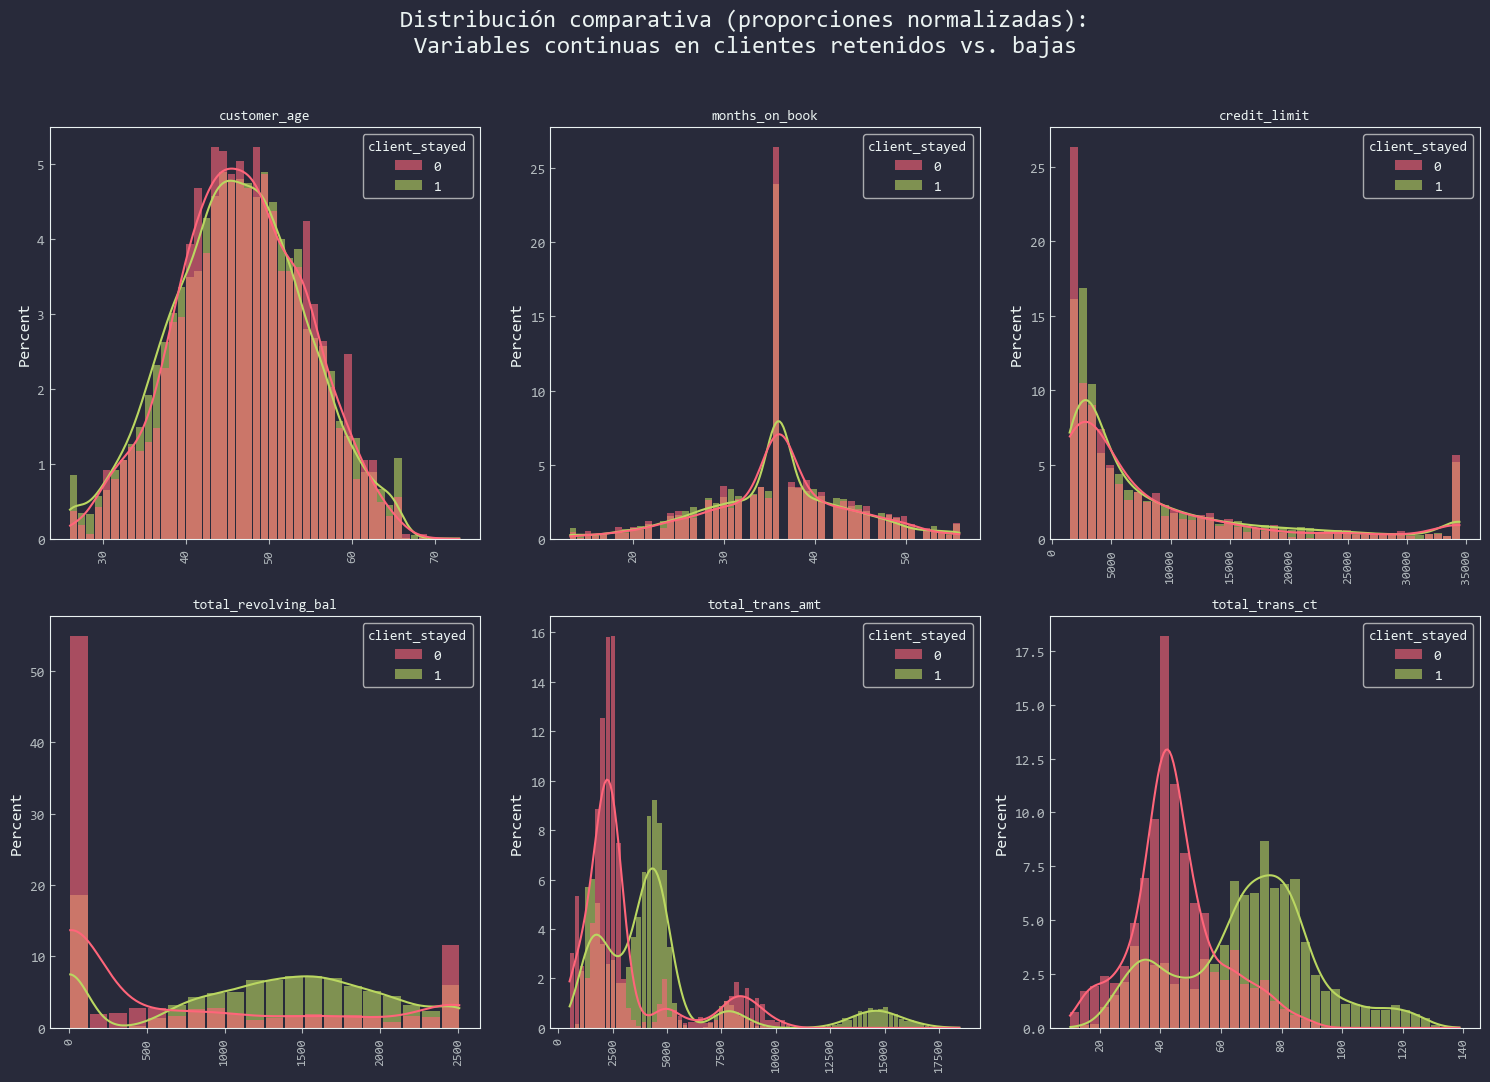

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(15, 11))

for ax, column in zip(axes.flat, cardinalidad_alta.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                 alpha=0.6, edgecolor='none', shrink=0.9,
                 stat='percent', common_norm=False, kde=True)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

fig.suptitle("Distribución comparativa (proporciones normalizadas):\n" +
             "Variables continuas en clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

- Las primeras 3 muestran distribuciones similares entre ambos grupos.
- Tres muestran diferencias significativas.
    - `total_revolving_bal`: Los clientes que se van presentan balances extremos (muy altos o muy bajos), mientras que los retenidos mantienen balances intermedios.
    - `total_tarans_amt`: Patrones de gasto claramente distintos entre grupos
    - `total_trans_ct`: La diferencia más marcada: los clientes retenidos realizan significativamente más transacciones. 
        - (Variable predictora más prometedora)

### Valores atípicos

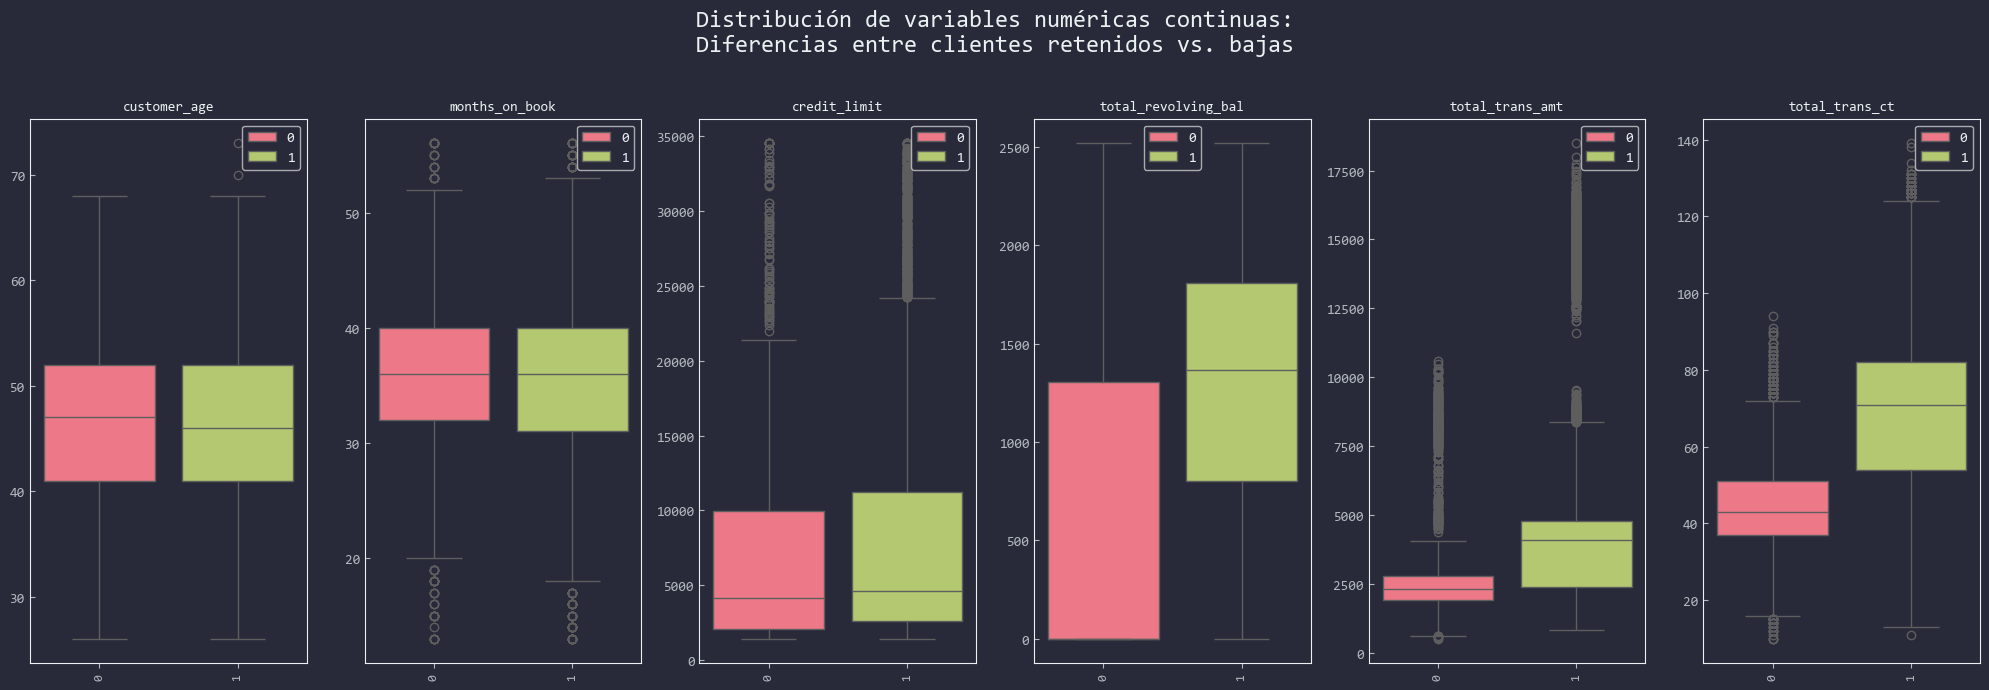

In [53]:
numeric_cols = cardinalidad_alta.drop('client_stayed', axis=1)

fig, axes = plt.subplots(1, 6, figsize=(20, 7))

for ax, column in zip(axes.flat, numeric_cols):
    sns.boxplot(data=df, x='client_stayed', y=column,
                hue='client_stayed', dodge=False, ax=ax)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend()

fig.suptitle("Distribución de variables numéricas continuas:\n" + 
             "Diferencias entre clientes retenidos vs. bajas",
             fontsize=17)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();

- En general la misma cantidad de outliers para los clientes retenidos y para los dados de baja. 
- Tratamientos:
    - Winsorización para `customer_age` y `months_on_book` por tener pocos valores atípicos.
    - Transformación para `credit_limit`, `total_trans_amt` y `total_trans_ct` ya que presentan una gran cantidad de atípicos; (log, sqrt, etc.).

### Análisis cruzado

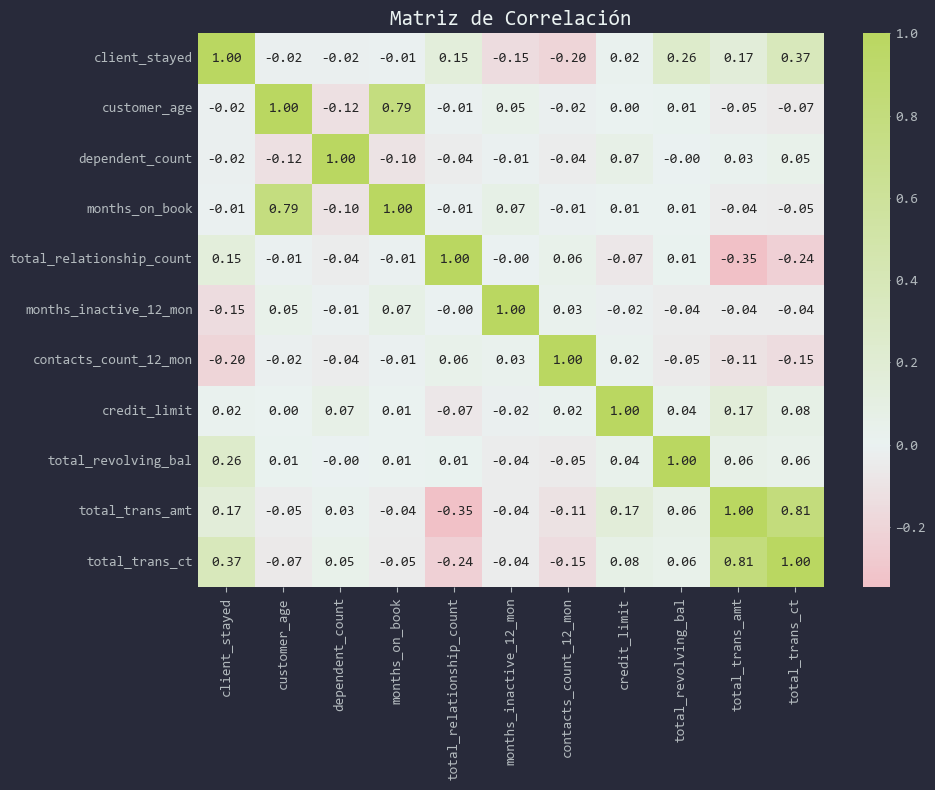

In [54]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=TOUTL_PALETTES["diverging"], fmt=".2f", center=0)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

- Variables con mayor correlación (absoluta) con la variable objetivo:
    - `total_trans_ct` (0.37)
    - `total_revolving_bal` (0.26)
    - `contacts_count_12_mon` (-0.20)
- Categorías relacionadas entre sí:
    - `total_trans_amt` y `total_trans_ct`, como era esperado.
    - `months_on_book` y `customer_age`.

In [55]:
income_clean = {'1666.6666666666667': '01667',
                '4166.666666666667': '04167',
                '5833.333333333333': '05833',
                '8333.333333333334': '08333',
                '10000.0': '10000',
                'Unknown': 'Unknown'}

df["income_category"] = df["income_category"].replace(income_clean)

orden_ingresos = ['01667', '04167', '05833', '08333', '10000', 'Unknown']

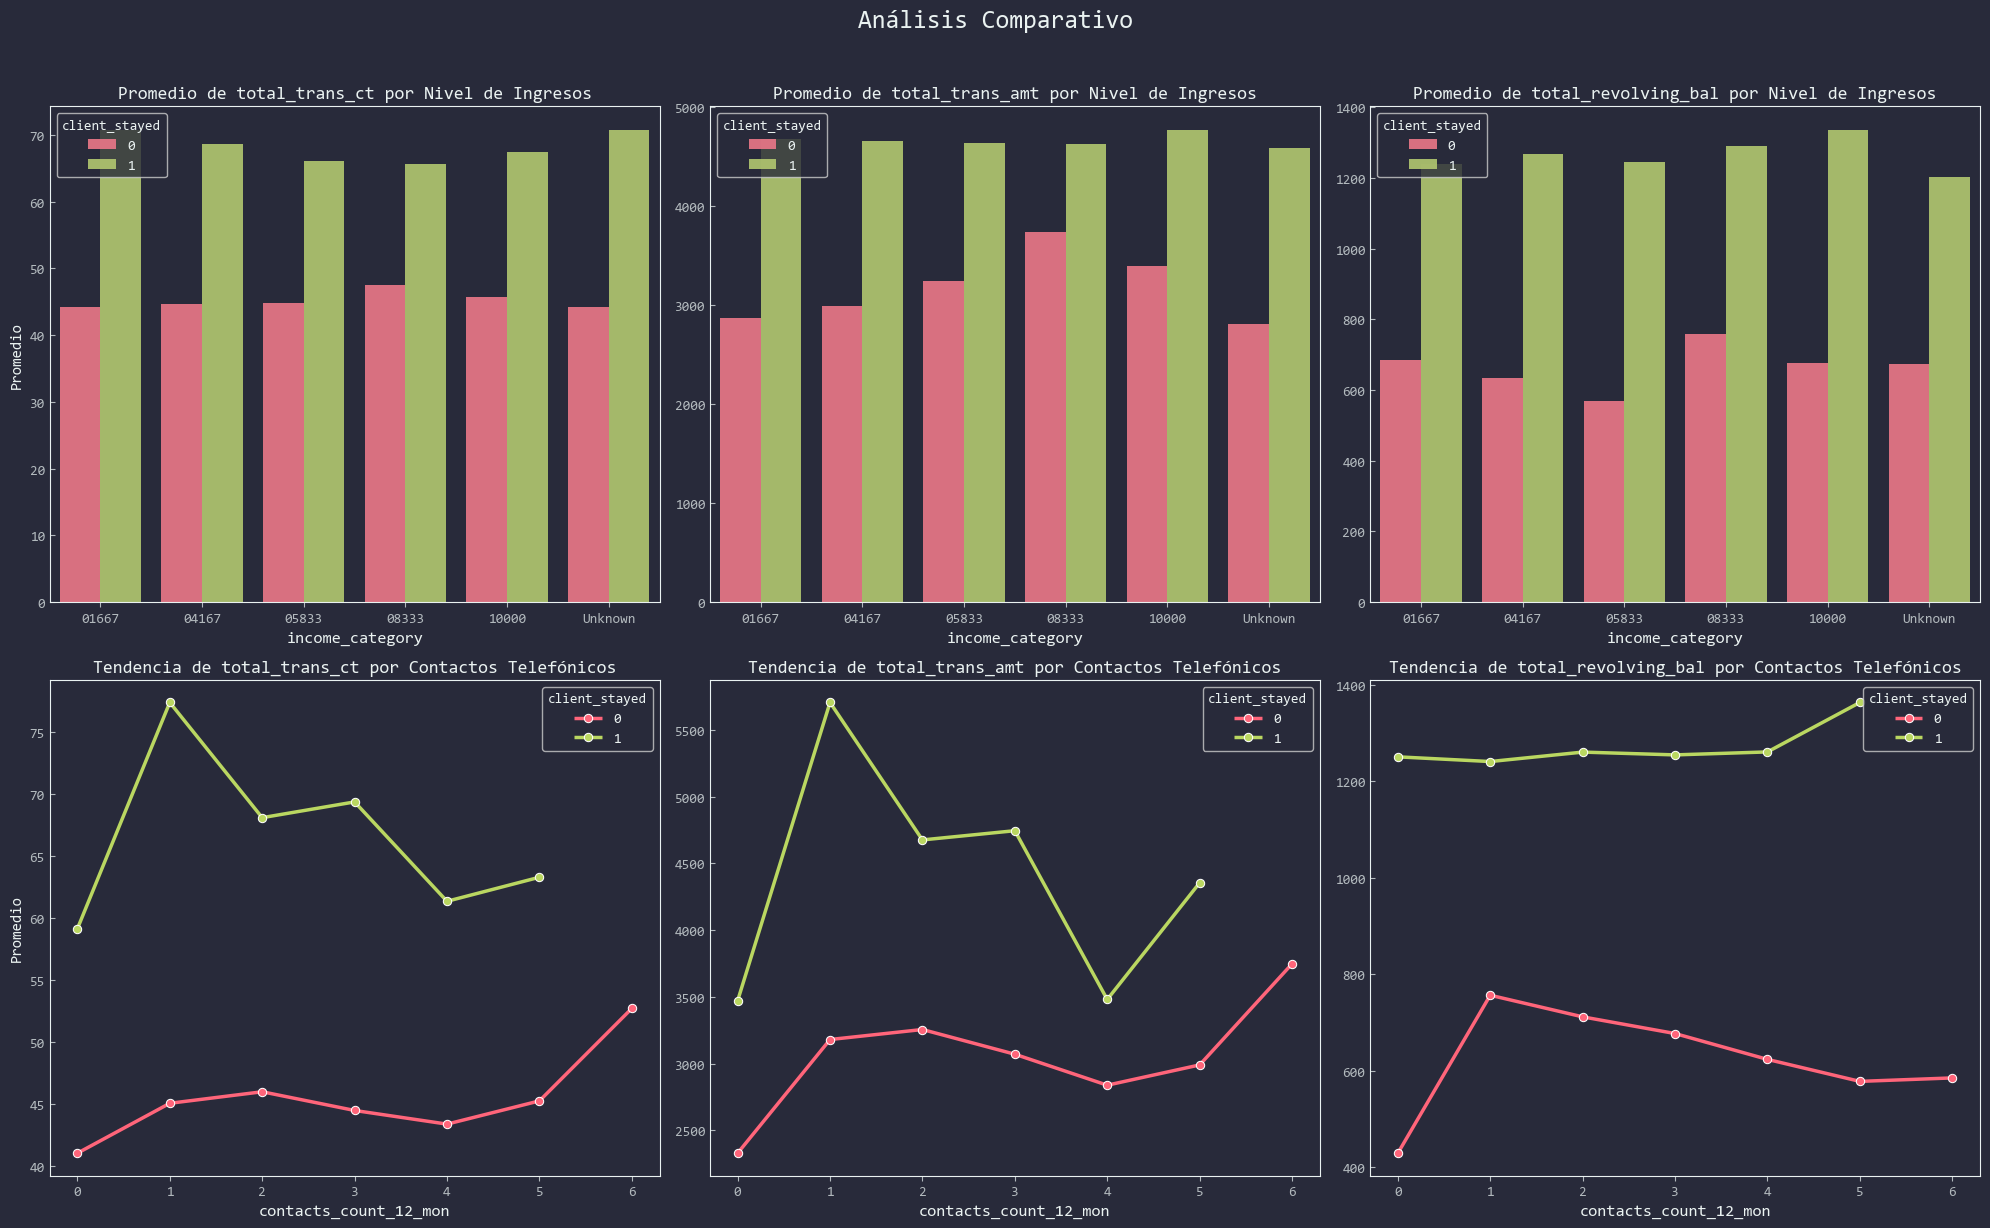

In [56]:
variables_compare = ['total_trans_ct', 'total_trans_amt', 'total_revolving_bal']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.suptitle("Análisis Comparativo", fontsize=18, y=1.02)

for ax, col in zip(axes[0], variables_compare):
    sns.barplot(data=df, x="income_category", y=col, hue="client_stayed", ax=ax,
                estimator='mean', errorbar=None, alpha=0.9, order=orden_ingresos)
    ax.set_title(f"Promedio de {col} por Nivel de Ingresos", fontsize=13)
    ax.set_ylabel("Promedio" if ax == axes[0,0] else "", fontsize=11)

for ax, col in zip(axes[1], variables_compare):
    sns.lineplot(data=df, x="contacts_count_12_mon", y=col, hue="client_stayed",
                ax=ax, estimator='mean', errorbar=None, linewidth=2.5, marker='o')
    ax.set_title(f"Tendencia de {col} por Contactos Telefónicos", fontsize=13)
    ax.set_ylabel("Promedio" if ax == axes[1,0] else "", fontsize=11)
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

- Las transacciones, el monto y el balance pendiente no presentan variaciones significativas según el nivel de ingreso del cliente.
- En promedio, los clientes que se dieron de baja muestran menor actividad en sus instrumentos crediticios en comparación con los que permanecieron.
- El número de contactos telefónicos parece aumentar en clientes que ya están en proceso de abandono, lo cual sugiere que una intervención temprana es clave, el nivel de ingreso no se relaciona directamente con la retención, dandonos a entender que el comportamiento financiero es el factor más relevante.                                                                                                                            
- Los clientes que permanecen muestran más actividad y compromiso con sus productos financieros, lo que se refleja en mayor número de transacciones, montos más altos y balances pendientes más elevados.
- TODO...

---

## Preprocesamiento

**Acciones a realizar:**

- Imputación.
- Codificación.
- Transformación.
- Estandarización.

In [57]:
dfp = df.copy()

### Imputación

Previo a la imputación, se realiza una prueba con el objetivo de verificar que la proporción de la variable de respuesta se mantine (igualdad estadística) al excluir la observaciones con valores `"Unknown"`.

$$
  \begin{cases}
    H_0: \rho_O = \rho_e = \rho_m = \rho_i = \rho_F \\
    H_1: \exists \ i, j \mid \rho_i \neq \rho_j
  \end{cases}
$$ 

Donde las proporciones son:
- $\rho_O:\ $ la original (sin excluir ningún `"Unknown"`).
- $\rho_e:\ $ tras excluir `"Unknown"` en `education_level`.
- $\rho_m:\ $ tras excluir `"Unknown"` en `marital_status`.
- $\rho_i:\ $ tras excluir `"Unknown"` en `income_category`.
- $\rho_F:\ $ tras excluir `"Unknown"` en todas las anteriores. 

<br>

Se utiliza un nivel de significancia del 5%:
$$ \alpha = 0.05 $$

In [58]:
var_unknowns = ["education_level", "marital_status", "income_category"]

successes = []
failures = []

successes.append(dfp["client_stayed"].sum())
failures.append(dfp.shape[0] - successes[-1])

dfpcp = dfp.copy()

for var in var_unknowns:
    valid = dfp[dfp[var] != "Unknown"]["client_stayed"]
    successes.append(valid.sum())
    failures.append(valid.shape[0] - successes[-1])
    dfpcp = dfpcp[dfpcp[var] != "Unknown"]

successes.append(dfpcp["client_stayed"].sum())
failures.append(dfpcp.shape[0] - successes[-1])

o = np.array([successes, failures])

chi2_stat, p_value, dof, expected = chi2_contingency(o, correction=False)

print(f"Estadístico de prueba: {chi2_stat:.4f}")

alfas = {0.05}  # {0.05, 0.01} 
for alfa in alfas:
    critical = chi2.isf(alfa, dof)
    print(f"Estadístico crítico @ {alfa}: {critical:.4f}  " \
          f"->  {"Rechazar Ho" if chi2_stat > critical else "Aceptar Ho"}")

Estadístico de prueba: 0.3957
Estadístico crítico @ 0.05: 9.4877  ->  Aceptar Ho


Por lo tanto, se concluye que las proporciones de clientes retenidos son estadísticamente iguales tanto a la proporción original como entre sí, tras excluir los `"Unknown"` de cada variable por separado y en conjunto.

<br>

Dado que la prueba confirma esta estabilidad, es posible proceder con la imputación con confianza.

Como el objetivo principal es conservar la distribución original de las variables, se optará por una imputación aleatoria basada en su distribución observada.

In [59]:
for var in var_unknowns:
    dfp[var] = dfp[var].apply(lambda x: np.nan if x == "Unknown" else x)

dfp.isna().sum()[4:7]

education_level    1519
marital_status      749
income_category    1112
dtype: int64

In [60]:
imputer = RandomSampleImputer(variables=var_unknowns)
dfp = imputer.fit_transform(dfp)
dfp.isna().sum()[4:7]

education_level    0
marital_status     0
income_category    0
dtype: int64

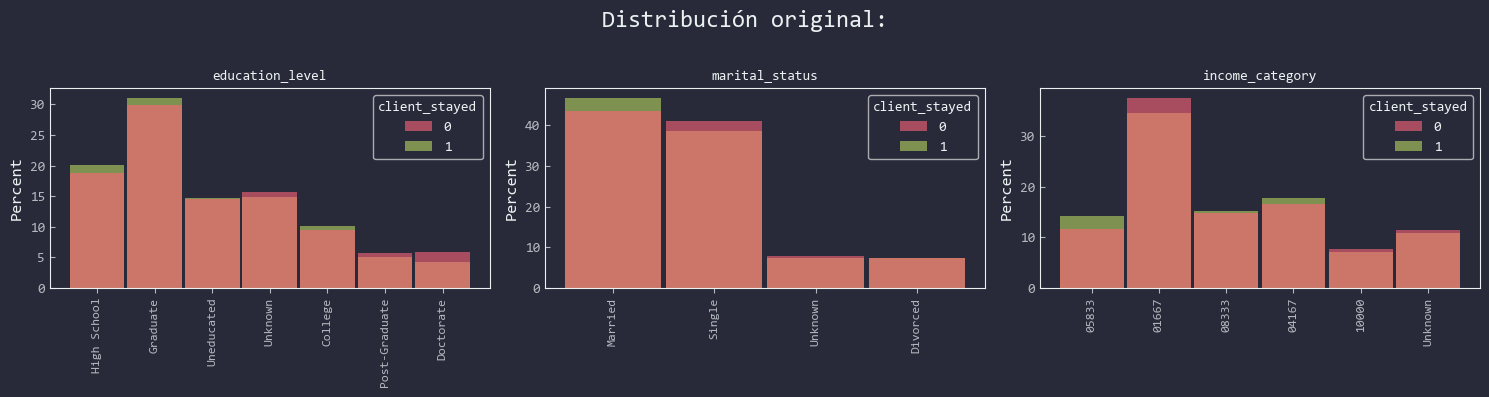

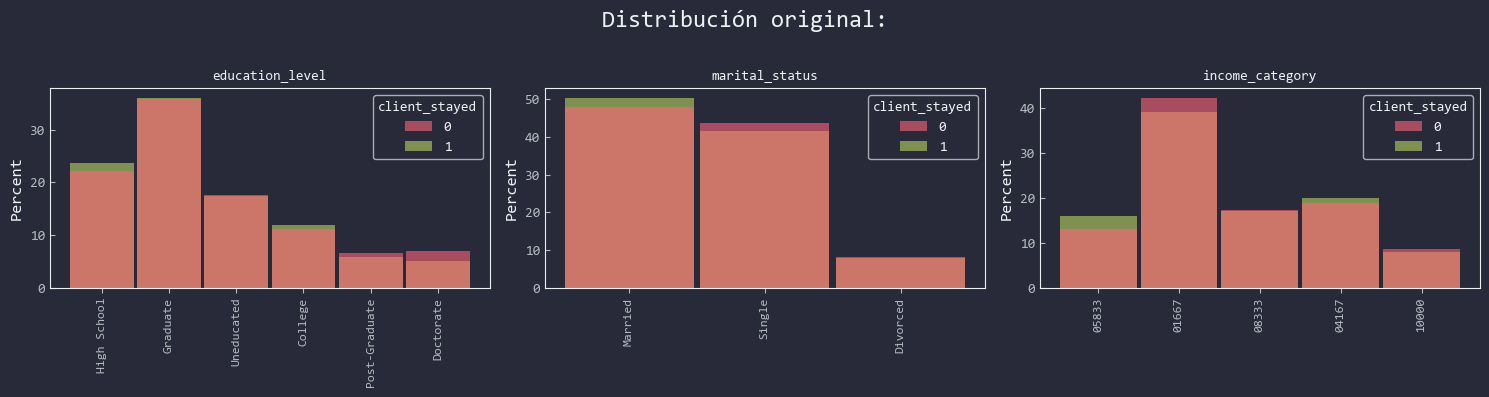

In [61]:
for data in (df, dfp):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for ax, column in zip(axes.flat, var_unknowns):
        sns.histplot(data=data, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                     alpha=0.6, edgecolor='none', shrink=0.95,
                     stat='percent', common_norm=False)
        ax.tick_params(axis='x', labelrotation=90, labelsize=9)
        ax.set_title(column, fontsize=10)
        ax.set_xlabel('')

    fig.suptitle(f"{"Distribución original:" if "gender" in data else "Distribución imputada:"}", fontsize=17)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show();

Las distribuciones se mantuvieron.

No hay media ni desviación estándar, pero la moda se mantuvo.

La correlación la checamos al final del preprocesamiento.

<br>

### Codificación

Métodos aplicados:
- `gender` se binariza para utilizarla como numérica.
- `education_level` se codifica utilizando *Ordinal Encoding*, ya que existe un orden lógico entre los niveles educativos.
- `marital_status` se transforma mediante *One-Hot Encoding*, dado que presenta pocas categorías y no hay un orden implícito.
- `income_category` simplemente se convierte a tipo numérico ya que sus valores respresentan montos.
- `card_category` se codifica mediante un **contraste polinómico lineal**, por dos razones:
    1. Reflejar las diferencias entre tipos de tarjetas.
    2. Suena **épico**.

In [62]:
def codificacion_lineal(var_ordenada,a1=1):
    n=len(var_ordenada)
    lim=n-1 if n%2==0 else (n-1)//2
    step=2 if n%2==0 else 1
    X=range(-lim,lim+1,step)
    a0=0
    Y=[a0+a1*x for x in X]
    return {categoria:y for categoria,y in zip(var_ordenada,Y)}

In [63]:
# Ordinal
education_order = {'Uneducated': -2.5, 'High School': -1.5, 'College': -0.5,
                   'Graduate': 0.5, 'Post-Graduate': 1.5, 'Doctorate': 2.5}
dfp["education_level"] = dfp["education_level"].map(education_order)

# One-Hot
if "marital_status" in dfp:
    dfp = pd.get_dummies(dfp, columns=["marital_status"], drop_first=True)
    marital_cols = dfp.iloc[:, -2:].columns.tolist()
    dfp[marital_cols] = dfp[marital_cols].astype(int)

# Binarización
dict_gender = {'F': 1, 'M': 0}
dfp["gender"] = dfp["gender"].map(dict_gender)
dfp = dfp.rename(columns={"gender": "is_female"})

# Conversión
dfp["income_category"] = dfp["income_category"].astype(float)

# Contraste polinómico
card_ordered = ['Blue', 'Silver', 'Gold', 'Platinum']
cod_card = codificacion_lineal(card_ordered, a1=0.5)
dfp["card_category"] = dfp["card_category"].map(cod_card)
# display(cod_card)

display(dfp.head())

,client_stayed,customer_age,is_female,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,marital_status_Married,marital_status_Single
0,1,45,0,3,-1.5,5833.0,-1.5,39,5,1,3,12691.0,777,1144,42,1,0
1,1,49,1,5,0.5,1667.0,-1.5,44,6,1,2,8256.0,864,1291,33,0,1
2,1,51,0,3,0.5,8333.0,-1.5,36,4,1,0,3418.0,0,1887,20,1,0
3,1,40,1,4,-1.5,1667.0,-1.5,34,3,4,1,3313.0,2517,1171,20,0,1
4,1,40,0,3,-2.5,5833.0,-1.5,21,5,1,0,4716.0,0,816,28,1,0


### Transformación

In [64]:
display(df.skew(numeric_only=True))

client_stayed              -1.848449
customer_age               -0.033605
dependent_count            -0.020826
months_on_book             -0.106565
total_relationship_count   -0.162452
months_inactive_12_mon      0.633061
contacts_count_12_mon       0.011006
credit_limit                1.666726
total_revolving_bal        -0.148837
total_trans_amt             2.041003
total_trans_ct              0.153673
dtype: float64

Aplicaremos $\log$ con el objetivo de reducir el sesgo en las variables: `credit_limit` y `total_trans_amt`.

In [65]:
var_transform = ["credit_limit", "total_trans_amt"]

print("Original:")
print(dfp[var_transform].skew())

dfp[var_transform] = dfp[var_transform].apply(lambda x: np.log(x) if x.name != "client_stayed" else x)
print("\nLog:")
print(dfp[var_transform].skew())

Original:
credit_limit       1.666726
total_trans_amt    2.041003
dtype: float64

Log:
credit_limit       0.457081
total_trans_amt    0.262210
dtype: float64


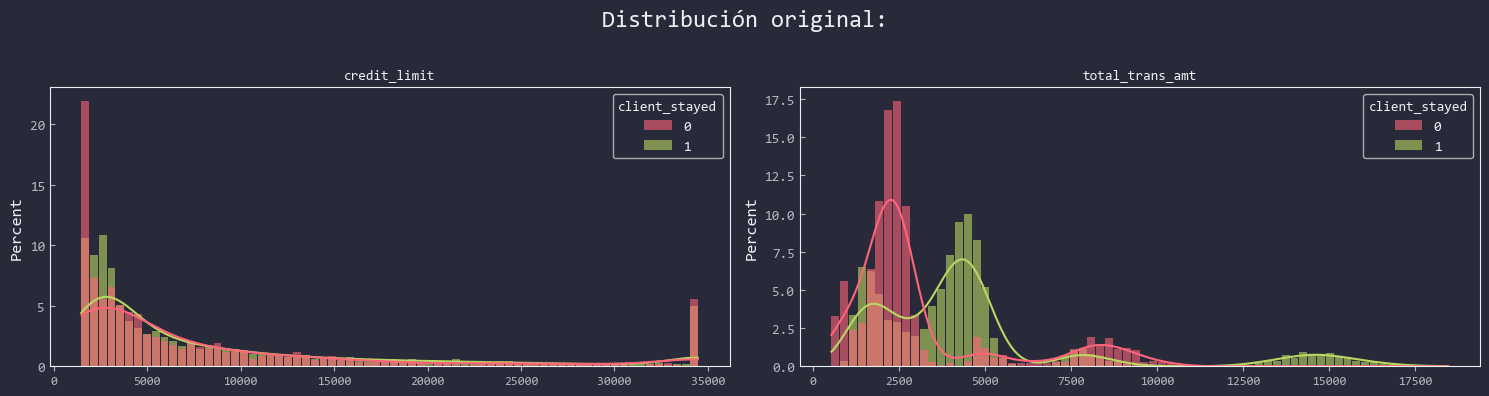

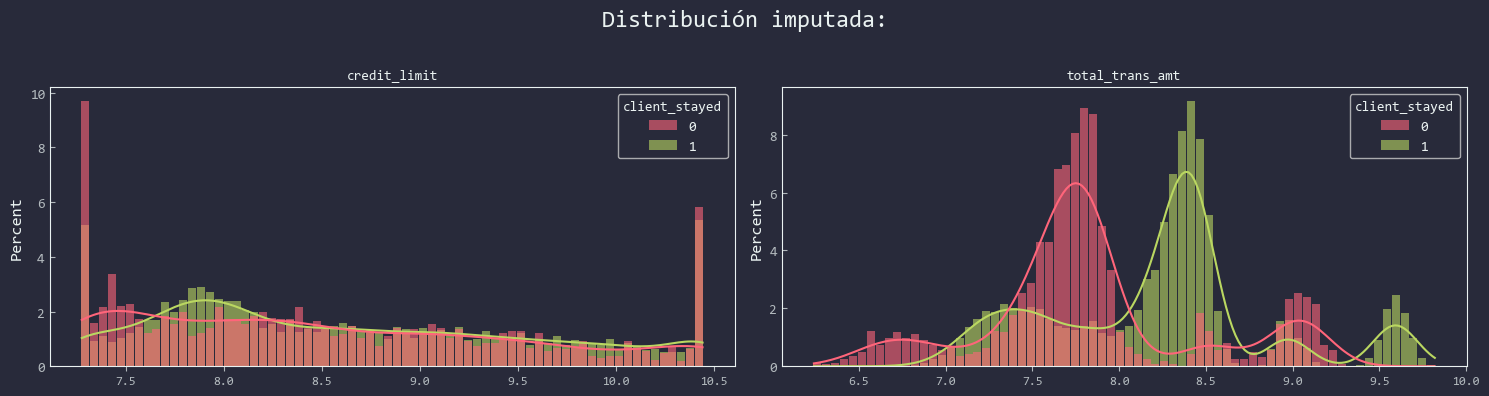

,credit_limit,total_trans_amt
count,10127.000000,10127.000000
mean,8.603412,8.164816
std,0.933769,0.654455
min,7.271217,6.234411
25%,7.845808,7.675778
50%,8.422663,8.268475
75%,9.311768,8.464003
max,10.449178,9.824661


In [66]:
for data in (df, dfp):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    for ax, column in zip(axes.flat, var_transform):
        sns.histplot(data=data, x=column, hue='client_stayed', ax=ax, # multiple='dodge',
                     alpha=0.6, edgecolor='none', shrink=0.9,
                     bins=70,
                     stat='percent', common_norm=False, kde=True)
        ax.tick_params(axis='x', labelsize=9)
        ax.set_title(column, fontsize=10)
        ax.set_xlabel('')

    fig.suptitle(f"{"Distribución original:" if "gender" in data else "Distribución imputada:"}", fontsize=17)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show();

# display(df[var_transform].describe())
display(dfp[var_transform].describe())

Todos los estadísticos se escalaron.

### Estandarización

Revisamos outliers para decidir si utilizar `StandarScaler` o `RobustScaler`, y en qué variables.

In [67]:
columnas_analizar = dfp.drop('client_stayed', axis=1).columns.tolist()

def generar_reporte_outliers(df, columnas):
    print("\n" + "="*92)
    print(f"{'REPORTE DE ATÍPICOS':^92}")
    print("="*92)
    print(f"{'Columna':<25} {'Tipo':<10} {'Atípicos':>10} {'%':>8} {'L. Inferior':>15} {'L. Superior':>15}")
    print("-"*92)
    
    for col in columnas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers/len(df))*100
        
        str_lim_inf = f"{lim_inf:,.2f}" if isinstance(lim_inf, float) else f"{int(lim_inf):,}"
        str_lim_sup = f"{lim_sup:,.2f}" if isinstance(lim_sup, float) else f"{int(lim_sup):,}"
        
        print(f"{col:<25} {str(df[col].dtype):<10} {n_outliers:>10,} {pct_outliers:>7.2f}% {str_lim_inf:>15} {str_lim_sup:>15}")

    print("="*92)

generar_reporte_outliers(dfp, columnas_analizar)
dfp.describe()


                                    REPORTE DE ATÍPICOS                                     
Columna                   Tipo         Atípicos        %     L. Inferior     L. Superior
--------------------------------------------------------------------------------------------
customer_age              int64               2    0.02%           24.50           68.50
is_female                 int64               0    0.00%           -1.50            2.50
dependent_count           int64               0    0.00%           -2.00            6.00
education_level           float64             0    0.00%           -4.50            3.50
income_category           float64             0    0.00%       -8,332.00       18,332.00
card_category             float64           691    6.82%           -1.50           -1.50
months_on_book            int64             386    3.81%           17.50           53.50
total_relationship_count  int64               0    0.00%            0.00            8.00
months_inact

,client_stayed,customer_age,is_female,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,marital_status_Married,marital_status_Single
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.529081,2.346203,-0.440851,4622.468352,-1.416362,35.928409,3.812580,2.341167,2.455317,8.603412,1162.814061,8.164816,64.858695,0.500148,0.419769
std,0.367235,8.016814,0.499178,1.298908,1.418800,2904.104630,0.333784,7.986416,1.554408,1.010622,1.106225,0.933769,814.987335,0.654455,23.472570,0.500025,0.493545
min,0.000000,26.000000,0.000000,0.000000,-2.500000,1667.000000,-1.500000,13.000000,1.000000,0.000000,0.000000,7.271217,0.000000,6.234411,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,-1.500000,1667.000000,-1.500000,31.000000,3.000000,2.000000,2.000000,7.845808,359.000000,7.675778,45.000000,0.000000,0.000000
50%,1.000000,46.000000,1.000000,2.000000,-0.500000,4167.000000,-1.500000,36.000000,4.000000,2.000000,2.000000,8.422663,1276.000000,8.268475,67.000000,1.000000,0.000000
75%,1.000000,52.000000,1.000000,3.000000,0.500000,8333.000000,-1.500000,40.000000,5.000000,3.000000,3.000000,9.311768,1784.000000,8.464003,81.000000,1.000000,1.000000
max,1.000000,73.000000,1.000000,5.000000,2.500000,10000.000000,1.500000,56.000000,6.000000,6.000000,6.000000,10.449178,2517.000000,9.824661,139.000000,1.000000,1.000000


- Las variables binarias no serán estandarizadas.

- Se utilizará RobustScaler en las 7 variables con atípicos incluyendo `total_revolving_bal` por su distribución achatada con picos en los límites.

In [68]:
var_est = ["dependent_count", "education_level", "income_category", "total_relationship_count", "credit_limit"]
var_rob = ["customer_age", "card_category", "months_on_book", "months_inactive_12_mon",
           "contacts_count_12_mon", "total_revolving_bal", "total_trans_amt", "total_trans_ct"]

est_sc = StandardScaler()
rob_sc = RobustScaler()

dff = dfp.copy()

dff[var_est] = est_sc.fit_transform(dff[var_est])
dff[var_rob] = rob_sc.fit_transform(dff[var_rob])

dff

,client_stayed,customer_age,is_female,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,marital_status_Married,marital_status_Single
0,1,-0.090909,0,0.503368,-0.746547,0.416855,0.0,0.333333,0.763943,-1.0,1.0,0.905232,-0.350175,-1.555633,-0.694444,1,0
1,1,0.272727,1,2.043199,0.663164,-1.017737,0.0,0.888889,1.407306,-1.0,0.0,0.444761,-0.289123,-1.402268,-0.944444,0,1
2,1,0.454545,0,0.503368,0.663164,1.277748,0.0,0.000000,0.120579,-1.0,-2.0,-0.499721,-0.895439,-0.920716,-1.305556,1,0
3,1,-0.545455,1,1.273283,-0.746547,-1.017737,0.0,-0.222222,-0.522785,2.0,-1.0,-0.533137,0.870877,-1.526038,-1.305556,0,1
4,1,-0.545455,0,0.503368,-1.451403,0.416855,0.0,-1.666667,0.763943,-1.0,-2.0,-0.154967,-0.895439,-1.984281,-1.083333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0.363636,0,-0.266547,0.663164,-0.156844,0.0,0.444444,-0.522785,0.0,1.0,-0.330518,0.403509,1.748954,1.388889,0,1
10123,0,-0.454545,0,-0.266547,-0.041691,-0.156844,0.0,-1.222222,0.120579,0.0,1.0,-0.259611,0.638596,1.027539,0.055556,0,0
10124,0,-0.181818,1,-1.036462,-0.746547,-1.017737,0.0,0.000000,0.763943,1.0,2.0,-0.008131,-0.895439,1.231310,-0.194444,1,0
10125,0,-1.454545,0,-0.266547,0.663164,-0.156844,0.0,0.000000,0.120579,1.0,1.0,-0.033780,-0.895439,0.972966,-0.138889,0,1


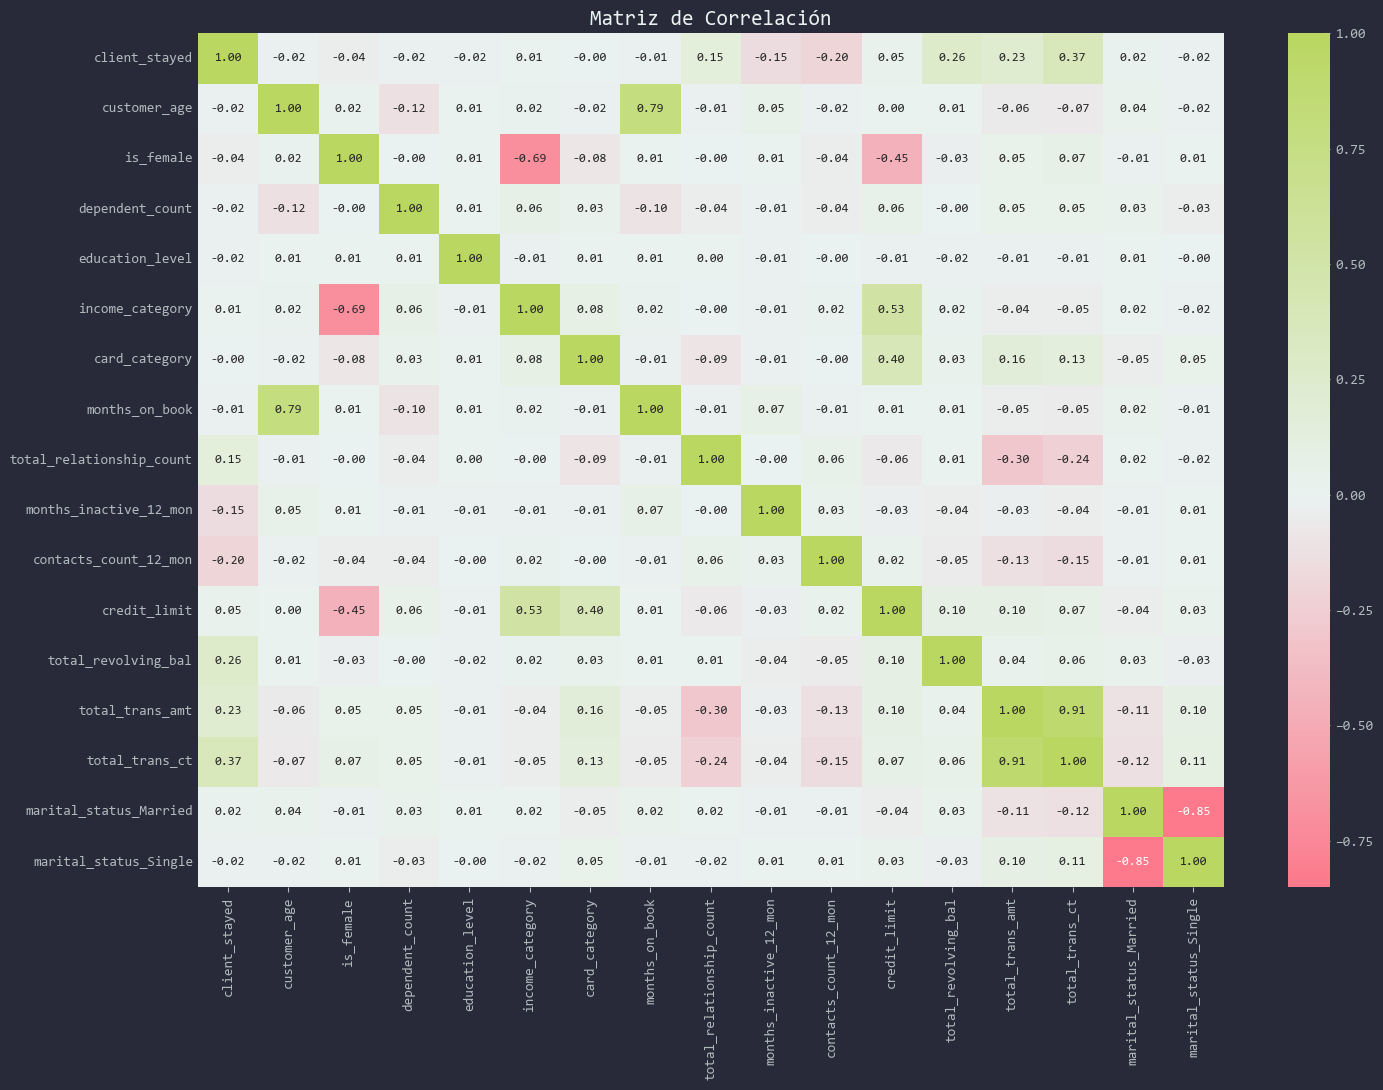

In [69]:
def mat_corr(corr: pd.DataFrame):
    plt.figure(figsize=(15, 11))
    sns.heatmap(corr, annot=True, cmap=TOUTL_PALETTES["diverging"], fmt=".2f", center=0, annot_kws={"fontsize":9})
    plt.title("Matriz de Correlación")
    plt.tight_layout()
    plt.show()

corr = dfp.corr()
mat_corr(corr)

- Las variables que tenían alta correlación con la varible de respuesta se mantuvieron.
    - `total_trans_amt` subío 0.6.
- Del mismo modo las variables sobre transacciones matuvieron una correlación entre ellas y `total_relationship_count`.
- Ahora que las variables con `'Unknown'` están codificadas vemos que su potencial como variables predictoras es muy bajo.
- months_on_book tiene baja correlación con permanencia
Aunque suele pensarse que los clientes antiguos son más leales, aquí la correlación es prácticamente nula (~0.01). 
Esto indica que la antigüedad en sí no garantiza permanencia si no hay engagement.
- Género (`is_female`), edad (`customer_age`), educación y número de dependientes tienen correlaciones cercanas a cero con client_stayed, por lo tanto:     Las características personales no predicen retención, lo que sugiere que es el comportamiento financiero lo que importa.
- Contactos y meses inactivos están relacionados con abandono

`months_inactive_12_mon`: correlación de -0.15

`contacts_count_12_mon`: correlación de -0.20

Ambos indican que la inactividad y la necesidad de mayores contactos (probablemente por insatisfacción o problemas) se asocian con una mayor probabilidad de salida del cliente.
<br>

- TODO...


---

## Feature engineering

In [70]:
display(dff.head())
display(dff.describe().round(2))
display(dff.columns)

,client_stayed,customer_age,is_female,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,marital_status_Married,marital_status_Single
0,1,-0.090909,0,0.503368,-0.746547,0.416855,0.0,0.333333,0.763943,-1.0,1.0,0.905232,-0.350175,-1.555633,-0.694444,1,0
1,1,0.272727,1,2.043199,0.663164,-1.017737,0.0,0.888889,1.407306,-1.0,0.0,0.444761,-0.289123,-1.402268,-0.944444,0,1
2,1,0.454545,0,0.503368,0.663164,1.277748,0.0,0.000000,0.120579,-1.0,-2.0,-0.499721,-0.895439,-0.920716,-1.305556,1,0
3,1,-0.545455,1,1.273283,-0.746547,-1.017737,0.0,-0.222222,-0.522785,2.0,-1.0,-0.533137,0.870877,-1.526038,-1.305556,0,1
4,1,-0.545455,0,0.503368,-1.451403,0.416855,0.0,-1.666667,0.763943,-1.0,-2.0,-0.154967,-0.895439,-1.984281,-1.083333,1,0


,client_stayed,customer_age,is_female,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,marital_status_Married,marital_status_Single
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.0,10127.00
mean,0.84,0.03,0.53,-0.00,0.00,0.00,0.08,-0.01,-0.00,0.34,0.46,0.00,-0.08,-0.13,-0.06,0.5,0.42
std,0.37,0.73,0.50,1.00,1.00,1.00,0.33,0.89,1.00,1.01,1.11,1.00,0.57,0.83,0.65,0.5,0.49
min,0.00,-1.82,0.00,-1.81,-1.45,-1.02,0.00,-2.56,-1.81,-2.00,-2.00,-1.43,-0.90,-2.58,-1.58,0.0,0.00
25%,1.00,-0.45,0.00,-1.04,-0.75,-1.02,0.00,-0.56,-0.52,0.00,0.00,-0.81,-0.64,-0.75,-0.61,0.0,0.00
50%,1.00,0.00,1.00,-0.27,-0.04,-0.16,0.00,0.00,0.12,0.00,0.00,-0.19,0.00,0.00,0.00,1.0,0.00
75%,1.00,0.55,1.00,0.50,0.66,1.28,0.00,0.44,0.76,1.00,1.00,0.76,0.36,0.25,0.39,1.0,1.00
max,1.00,2.45,1.00,2.04,2.07,1.85,3.00,2.22,1.41,4.00,4.00,1.98,0.87,1.97,2.00,1.0,1.00


Index(['client_stayed', 'customer_age', 'is_female', 'dependent_count',
       'education_level', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_trans_amt', 'total_trans_ct', 'marital_status_Married',
       'marital_status_Single'],
      dtype='object')

In [71]:
def plot_variable(df: pd.DataFrame, var: str, is_numeric=True):
    fig, ax = plt.subplots(figsize=(7, 3))
    sns.histplot(data=df, x=var, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.9,
                 stat='percent', common_norm=False, kde=is_numeric)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(var, fontsize=10)
    ax.set_xlabel('')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show();

a. `avg_trans_amt_per_ct`
- Se calcula como `np.log(total_trans_amt/total_trans_ct)` y luego se aplica `RobustScaler`.
- Hipótesis / Utilidad: Captura el gasto medio por operación, comprime la cola derecha y mitiga outliers.
- Comportamiento: 

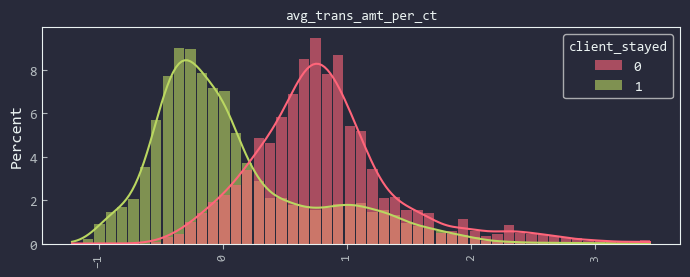

In [72]:
avg_trans_amt_per_ct = np.log(dfp.total_trans_amt / dfp.total_trans_ct)
dff["avg_trans_amt_per_ct"] = rob_sc.fit_transform(pd.DataFrame(avg_trans_amt_per_ct))
plot_variable(dff, "avg_trans_amt_per_ct")

b. `debt_to_income_ratio`
- Se calcula como `np.sqrt(total_revolving_bal/income_category)` y luego se aplica `RobustScaler`.
- Hipótesis / Utilidad: Mide la proporción de deuda sobre ingreso; la raíz comprime el rango y el escalado atenúa outliers.
- Comportamiento: 

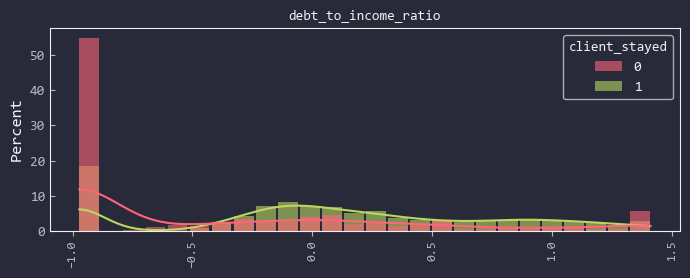

In [73]:
debt_to_income_ratio = np.sqrt(dfp.total_revolving_bal / dfp.income_category)
dff["debt_to_income_ratio"] = rob_sc.fit_transform(pd.DataFrame(debt_to_income_ratio))
plot_variable(dff, "debt_to_income_ratio")

c. `trans_to_relation_ratio`
- Se calcula como `np.log(total_trans_ct/total_relationship_count)` y luego se aplica `RobustScaler`.
- Hipótesis / Utilidad: refleja cuántas transacciones hace el cliente por relación abierta; el log evita valores infinitos y comprime la cola.
- Comportamiento: 

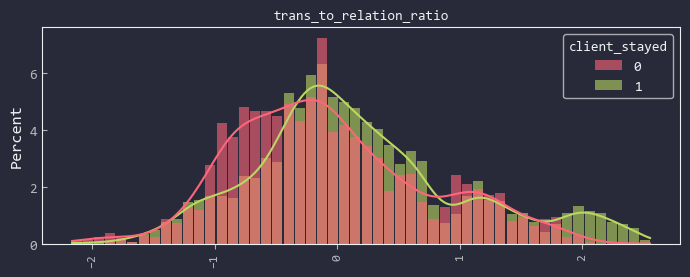

In [74]:
trans_to_relation_ratio = np.log(dfp.total_trans_ct / dfp.total_relationship_count)
dff["trans_to_relation_ratio"] = rob_sc.fit_transform(pd.DataFrame(trans_to_relation_ratio))
plot_variable(dff, "trans_to_relation_ratio")

d. `trans_to_contacts_ratio`
- Se calcula como `np.log(total_trans_ct/(contacts_count_12_mon+1))` y luego se aplica `RobustScaler`.
- Hipótesis / Utilidad: cuantifica la relación entre la actividad transaccional y la necesidad de asistencia
    - Un ratio alto indica uso autónomo sin requerir soporte, mientras uno bajo puede señalar procesos complejos o problemas.
    - Ya se suma +1 para evitar división por cero; valida su efecto con importancia de variable en tu modelo.
- Comportamiento: 

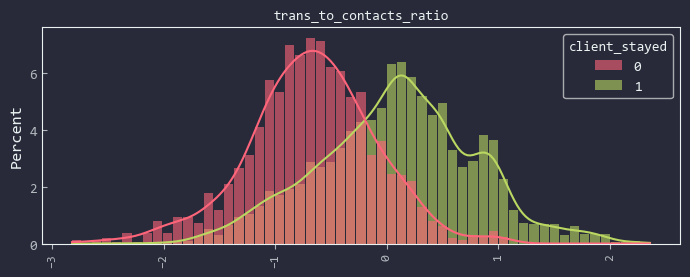

In [75]:
trans_to_contacts_ratio = np.log(dfp.total_trans_ct / (dfp.contacts_count_12_mon + 1))
dff["trans_to_contacts_ratio"] = rob_sc.fit_transform(pd.DataFrame(trans_to_contacts_ratio))
plot_variable(dff, "trans_to_contacts_ratio")

e. `dif_cred_lim_and_avg_trans`
- Se calcula como `credit_limit - avg_trans_amt_per_ct * 10` y luego se aplica `RobustScaler`.
- Hipótesis / Utilidad: Mide cuánto margen tiene el cliente entre su límite de crédito y su gasto promedio ajustado.
    - El factor *10 se utiliza para amplificar la diferencia y destacar posibles tensiones de crédito.
- Comportamiento: 

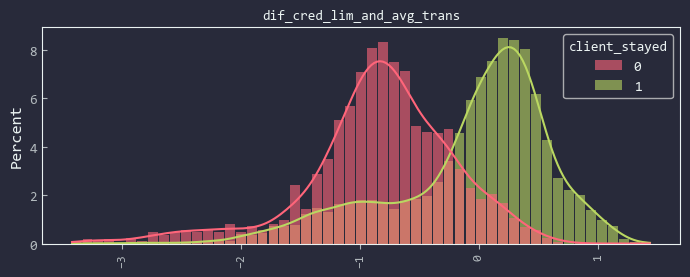

In [76]:
dif_cred_lim_and_avg_trans = dff.credit_limit - dff.avg_trans_amt_per_ct*10
dff["dif_cred_lim_and_avg_trans"] = rob_sc.fit_transform(pd.DataFrame(dif_cred_lim_and_avg_trans))
plot_variable(dff, "dif_cred_lim_and_avg_trans")

f. `is_vip`
- Se calcula 
- Hipótesis / Utilidad: 
- Comportamiento: 

In [77]:
is_vip = 0
# dff["is_vip"]
# plot_variable(dff, "is_vip", is_numeric=False)

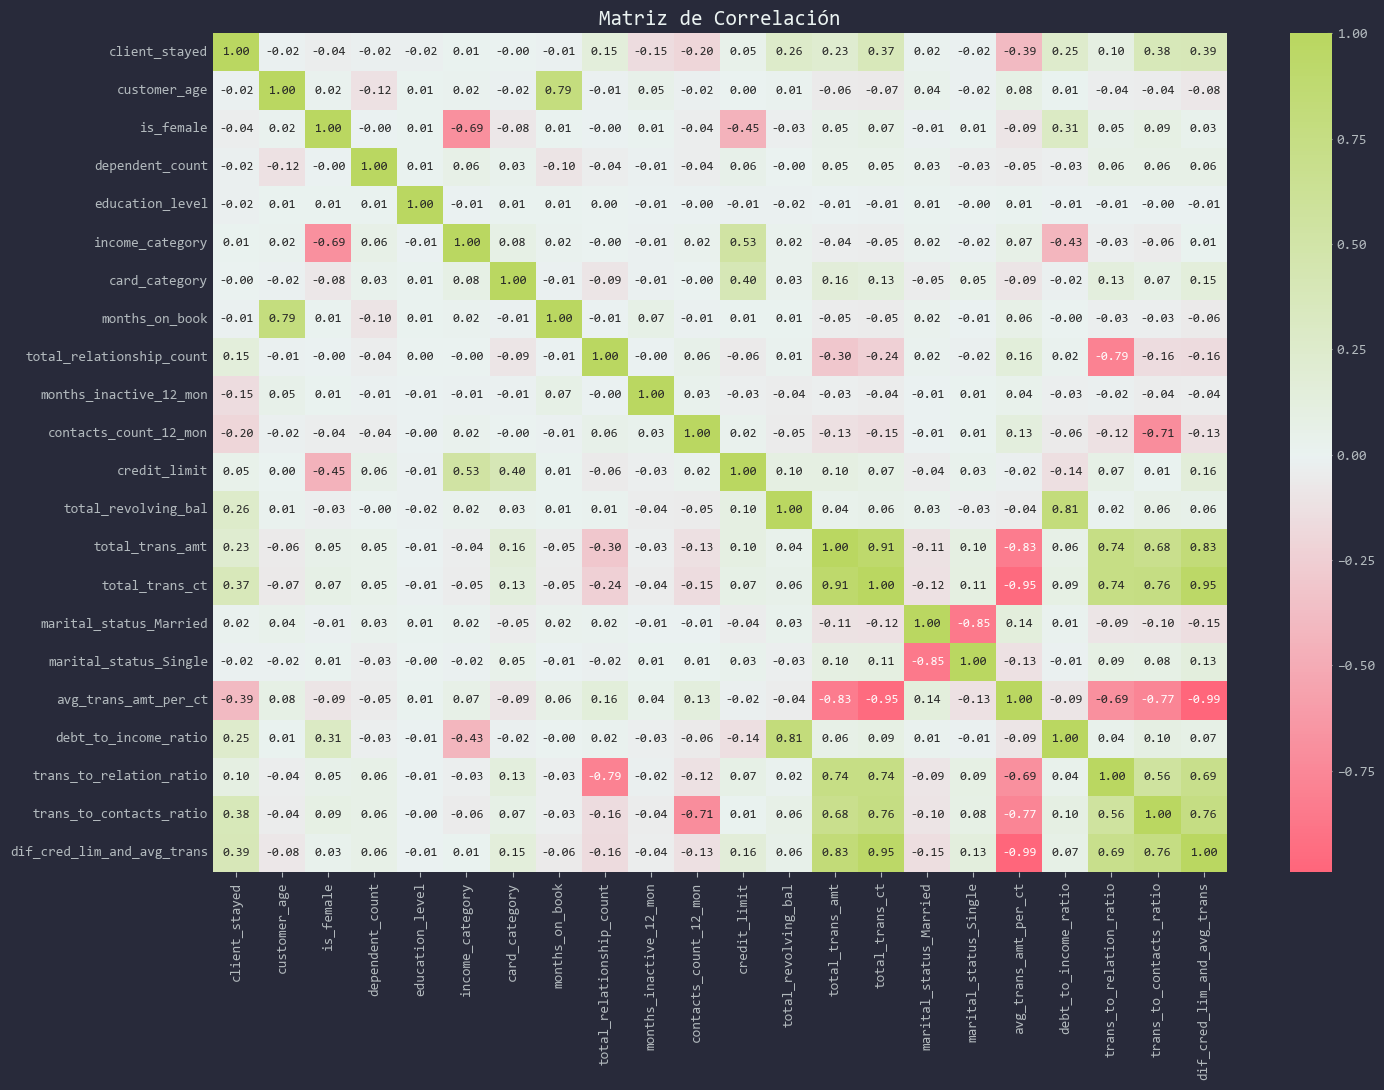

In [78]:
corr = dff.corr()
mat_corr(corr)

---

## Selección de variables

In [79]:
dfm = dff.copy()

In [83]:
seed = 42
np.random.seed(seed)

# --- Preprocesamiento ---
X = dfm.drop(columns=["client_stayed"])
y = dfm["client_stayed"]

# One-Hot Encoding para columnas no numéricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Asegurar que los datos estén en formato NumPy
X_np = X_encoded.values
y_np = y.values

# --- KFold setup ---
kf = StratifiedKFold(n_splits=6, shuffle=True, random_state=seed)
auc_scores = []

print("AUC por fold y top 5 coeficientes por importancia:\n")

for fold, (train_idx, test_idx) in enumerate(kf.split(X_np, y_np)):
    X_train, X_test = X_np[train_idx], X_np[test_idx]
    y_train, y_test = y_np[train_idx], y_np[test_idx]

    model = LogisticRegression(random_state=seed, max_iter=1000)
    model.fit(X_train, y_train)

    y_probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_probs)
    auc_scores.append(auc)

    # Mostrar top 5 coeficientes por importancia
    coef_series = pd.Series(model.coef_[0], index=X_encoded.columns)
    top_vars = coef_series.abs().sort_values(ascending=False).head(5)
    
    print(f"Fold {fold + 1} - AUC: {auc:.4f}")
    print(top_vars, "\n")

# --- Resultados globales ---
print(f"\nAUCs por fold: {np.round(auc_scores, 4)}")
print(f"AUC promedio: {np.mean(auc_scores):.4f}")

AUC por fold y top 5 coeficientes por importancia:

Fold 1 - AUC: 0.9180
total_trans_ct             8.441215
total_trans_amt            2.746372
trans_to_relation_ratio    1.399788
trans_to_contacts_ratio    0.834047
debt_to_income_ratio       0.782377
dtype: float64 

Fold 2 - AUC: 0.9253
total_trans_ct             8.262035
total_trans_amt            2.707603
trans_to_relation_ratio    1.520036
is_female                  0.769231
debt_to_income_ratio       0.766513
dtype: float64 

Fold 3 - AUC: 0.9279
total_trans_ct             8.200481
total_trans_amt            2.651606
trans_to_relation_ratio    1.410468
debt_to_income_ratio       0.800208
is_female                  0.593449
dtype: float64 

Fold 4 - AUC: 0.9300
total_trans_ct             8.328142
total_trans_amt            2.614808
trans_to_relation_ratio    1.644611
debt_to_income_ratio       0.890501
is_female                  0.708520
dtype: float64 

Fold 5 - AUC: 0.9419
total_trans_ct             8.233099
total_trans_amt    

In [81]:
# # Opción 1: Incluir "Unknown" (usando 'nivel_encoded' ya calculado)
# X = df[['nivel_encoded']]
# y = df['client_stayed']
# model = LogisticRegression().fit(X, y)
# y_pred = model.predict_proba(X)[:, 1]
# print(f"AUC con 'Unknown': {roc_auc_score(y, y_pred):.2f}")

# # Opción 2: Eliminar "Unknown" (CORRECCIÓN: sin comilla extra en 'client_stayed')
# df_clean = df[df['education_level'] != 'Unknown']  # Asegúrate que el nombre de la columna coincide
# X_clean = df_clean[['nivel_encoded']]
# y_clean = df_clean['client_stayed']  # <- Corrección aquí (sin comillas adicionales)
# model_clean = LogisticRegression().fit(X_clean, y_clean)
# y_pred_clean = model_clean.predict_proba(X_clean)[:, 1]
# print(f"AUC sin 'Unknown': {roc_auc_score(y_clean, y_pred_clean):.2f}")

### Preguntas

- ¿Cómo se implementó el método utilizado?
- ¿Por qué se escogió este método?
- ¿Qué variables se van a seleccionar con el método?
- ¿Cómo puedo demostrar que las variables elegidas son mejores que las no elegidas?
- ¿Algunas de las variables generadas con el punto b quedaron elegidas? ¿Por qué?